<a href="https://colab.research.google.com/github/Fatai-soliu/ANN-for-Image-Classification/blob/main/ANN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Setup

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# Import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Data Preprocessing

In [ ]:
# Import the dataset (built-in dataset)
#Link to dataset in Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train , y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Min and Max values in the dataset - pixel values

np.max(x_train), np.min(x_train)

(255, 0)

In [ ]:
# Let's do same for label y

np.min(y_train), np.max(y_train)

(0, 9)

In [ ]:
#Define the values - Assigning labels

class_name = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

print(class_name)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Data Exploration

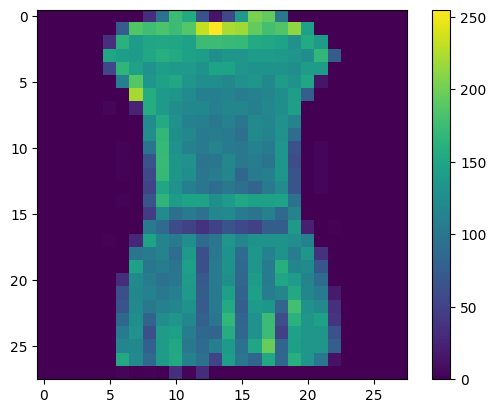

In [ ]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [ ]:
y_train[3]

3

In [ ]:
# Normalize the data
# This is important because after normalization, neural networks learn faster (There are 256 pixel)

x_train = x_train / 255.0
x_test = x_test / 255.0

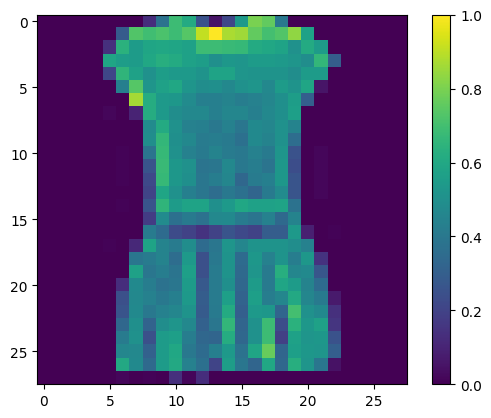

In [ ]:
#After Normalization
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [ ]:
# Flatten the dataset
# Converting 60,000 2D arrays to 60,000 1D arrays (a vector)
# Artificial nueral network requires vector input

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1 , 28*28)

In [ ]:
#After flatenning

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building Model

In [ ]:
#Define an object ( Using squential class because we are creating a fully connected nueral network)

model = tf.keras.models.Sequential()
# sequence of layer

In [ ]:
#Adding first fully connected hidden layer

# 1) Units (No of nuerons) = 128
# 2) activation function = ReLU
# 3) input_shape = 784

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [ ]:
# Adding the second layer with dropout

model.add(tf.keras.layers.Dropout(0.3))   # regularization technique to prevent overfitting

In [ ]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax

model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

# Model Traning

In [ ]:
# Compiling Model
# 1) Optimizer = adam (minimize loss function)
# 2) loss function = sparse_categorical_crossentropy (acts as a guide to optimizer to find the best fit (global minimu))
# 3) metrics = sparse_categorical_accuracy  (for multiple output)

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model  (The accuracy and losss you see is on the training data)
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5547 - sparse_categorical_accuracy: 0.8020
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8479
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3861 - sparse_categorical_accuracy: 0.8586
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3656 - sparse_categorical_accuracy: 0.8664
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3507 - sparse_categorical_accuracy: 0.8708
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - sparse_categorical_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3280 - sparse_categorical_accuracy: 0.8797
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3197 - sparse_categorical_accuracy: 0.8803
Epoch 9/10
1875/1875 [========

# Model Evaluation

In [ ]:
#Model Evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3610 - sparse_categorical_accuracy: 0.8714


In [ ]:
print("Test Accuracy : {}".format(test_accuracy))
print("Test loss : {}".format(test_loss))

Test Accuracy : 0.871399998664856
Test loss : 0.3610197603702545


In [ ]:
#Model predictions
y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [ ]:
y_pred[0], y_test[0] #predicted and Actual output


(9, 9)

In [ ]:
y_pred[30], y_test[30] #predicted and Actual output


(8, 8)

In [ ]:
print(class_name)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[853   3  26   7   2   1 104   0   4   0]
 [  3 970   2  18   4   0   2   0   1   0]
 [ 12   1 881   6  64   0  35   0   1   0]
 [ 59   6  16 835  39   0  42   0   3   0]
 [  0   0 159  21 759   0  59   0   2   0]
 [  0   0   0   1   0 960   0  13   2  24]
 [143   1 166  11  63   0 610   0   6   0]
 [  0   0   0   0   0  29   0 906   0  65]
 [  3   0  11   3   4   2  12   3 962   0]
 [  1   0   0   0   0   3   0  18   0 978]]


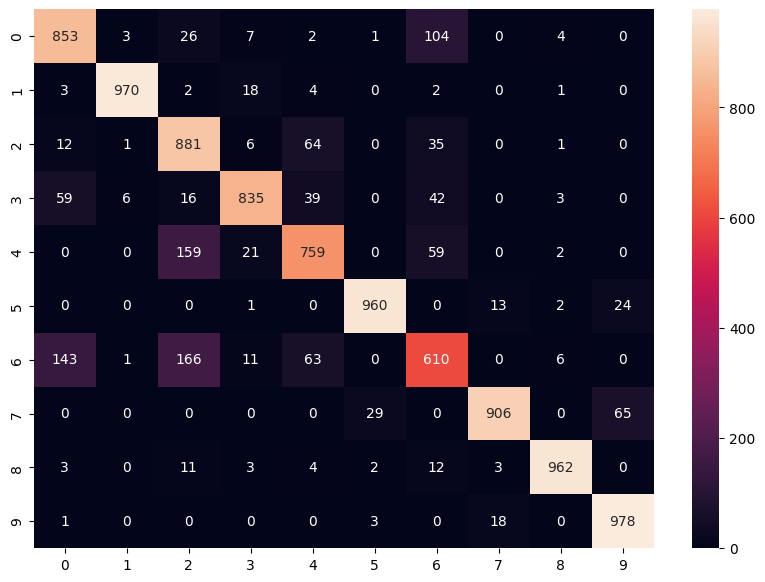

In [ ]:
# Create an Heatmap confusion matrix

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()

In [ ]:
#Using confusion matrix, calculate accuracy

acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8714
